In [1]:
import sklearn
import string
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('train.csv')
df.head(5)

C:\Users\willi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\willi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\willi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [3]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
len(df)

159571

In [5]:
df2 = df.copy()
df2 = df2

In [6]:
len(df2)

159571

In [7]:
txt = df2['comment_text'][0]
print(txt)

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [8]:
def clean_text(text):
    text = re.sub('/(\r\n)+|\r+|\n+|\t+/', '', text)
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r"\s+", ' ', text)
    text = [w for w in text.lower() if w not in string.punctuation]
    text = [w for w in text if w not in string.digits]
    text = ''.join(text)
    return text

In [9]:
txt = clean_text(txt)
txt

'explanationwhy the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now    '

In [10]:
df2['cleaned_text'] = df2['comment_text'].apply(lambda x: clean_text(x))

In [11]:
text = df2[df2['identity_hate'] == 1]
text2 = df2['cleaned_text']

text = str(text)
text2 = str(text2)

In [12]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
stopwords = set(STOPWORDS)

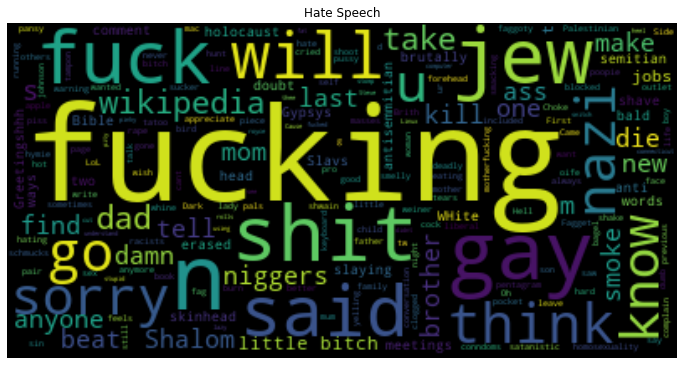

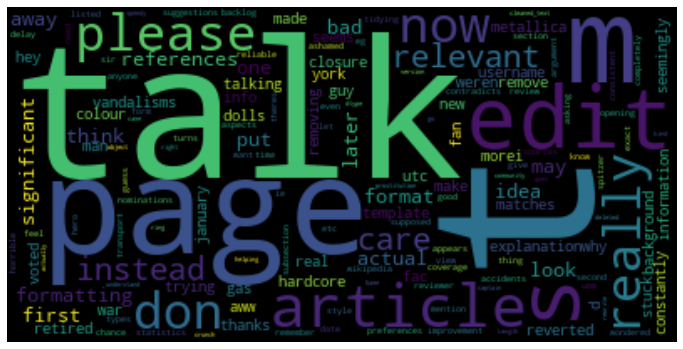

In [13]:
plt.figure(figsize=(12,12))
wc = WordCloud().generate(text)
plt.imshow(wc, interpolation='bilinear' )
plt.axis('off')
plt.title('Hate Speech')
plt.show()


plt.figure(figsize=(12,12))
wc = WordCloud().generate(text2)
plt.imshow(wc, interpolation='bilinear' )
plt.axis('off')
plt.show()



In [27]:
data = df2['cleaned_text'].values

In [28]:
data = str(data)

In [43]:
# data

In [30]:
data = data.split()

In [42]:
# data

In [32]:
word_data = set(data)

In [41]:
# word_data

In [34]:
BoW = dict.fromkeys(word_data, 0)
for word in data:
    BoW[word] += 1

In [40]:
# BoW

In [39]:
dfff = pd.DataFrame(BoW, BoW)

In [47]:
dfff.head()

,voted,now,m,seemingly,stuck,relevant,speedy,seems,version,me,...,with,war,guy,theres,goes,who,formatting,'spitzer,constantly,new
voted,1,2,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
now,1,2,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
m,1,2,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
seemingly,1,2,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
stuck,1,2,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [48]:
def tf(BoW, text):
    term_freq ={}
    word_count = len(txt)
    for word, count in BoW.items():
        term_freq[word] = count/float(word_count)
    return(term_freq)

In [49]:
terms = tf(BoW, word_data)

In [51]:
# terms

In [52]:
import math

In [53]:
def IDF(BoW):
    idf = {}
    N = len(BoW)
    tfidf = dict.fromkeys(BoW.keys())
    for word, val in tfidf.items():
        tfidf[word] = math.log10(N / float(N) +1)
    return tfidf

In [54]:
idfs = IDF(BoW)

In [56]:
# idfs

In [57]:
def tfidf(terms, idfs):
    tfidf = {}
    for word, val in terms.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [58]:
tfidf_dict = tfidf(terms, idfs)

In [60]:
# tfidf_dict

In [86]:
hate = df2[df2['identity_hate'] == 1]
df4 = df2[df2['threat'] == 1]

In [89]:
df3 = pd.concat([hate, df4])

In [90]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1883 entries, 42 to 159400
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1883 non-null   object
 1   comment_text   1883 non-null   object
 2   toxic          1883 non-null   int64 
 3   severe_toxic   1883 non-null   int64 
 4   obscene        1883 non-null   int64 
 5   threat         1883 non-null   int64 
 6   insult         1883 non-null   int64 
 7   identity_hate  1883 non-null   int64 
 8   cleaned_text   1883 non-null   object
dtypes: int64(6), object(3)
memory usage: 147.1+ KB


In [91]:
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pyLDAvis.sklearn

In [110]:
vec = TfidfVectorizer(
                      lowercase = True,
                      analyzer = 'word',
                      stop_words = 'english',
                      min_df = 15
                      )
          
                      
                      

In [111]:
X = vec.fit_transform(df3['cleaned_text'])

In [116]:
lda = LatentDirichletAllocation(n_components=5, random_state = 0)
lda_model = lda.fit(X)

## Topics 1 and 3 seem to talk about race, specifically Jewish and Muslim with a high relevence for their respective topics.  Anti appears near the top for topic 3 which could refer to anti-semmitism that I saw in the word cloud above. Warning also appears at the bottom with a higher relevance compared to it's overall use in each document.  Topic 4 also contains the word jew but also words that would be found in threatening speech like kill, burn, death, and rape.  Hitler is also mentioned.  You see family and house in topic 5 which might hint at a threat directed toward an individual instead of a group of people.

## Topic 1, 3, and 4 are most concerning to me.  Topics 2 and 5 seem to contain offensive language but what stood out to me was shoot in topic 5 and chinese and arab in topic 2.

## Topic modeling could be useful to quickly identify anything that could increase tensions, lead to human rights violations and spark violence.  It could identify and mis/disinformation and prevent any chaos it may cause.  On the other hand it could be used by bad actors to identify where hate is directed and what gets people emotional.  These bad actors can take control of the narrative and manipulate the masses.

In [117]:
#Sliding Lambda closer to 0 highlights less frequent terms that could provide more meaning
#Lambda around .6 got good results
#Area of circle is porportional to the words of that topic
pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.sklearn.prepare(lda_model, X, vec)
pyLDAvis.display(vis)

C:\Users\willi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
